In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies
from Historic_Crypto import LiveCryptoData

In [3]:
data = Cryptocurrencies(coin_search = 'USDC', extended_output=False).find_crypto_pairs()
data

Connected to the CoinBase Pro API.
Found 14 instances containing the term USDC.
Extended Output is False, returning reduced dataset.


,id,display_name,fx_stablecoin,max_slippage_percentage,status
66,BAT-USDC,BAT/USDC,False,0.03000000,online
82,CVC-USDC,CVC/USDC,False,0.03000000,online
101,DAI-USDC,DAI/USDC,True,0.01000000,online
108,USDC-GBP,USDC/GBP,True,0.01000000,online
118,USDC-EUR,USDC/EUR,True,0.01000000,online
215,ADA-USDC,ADA/USDC,False,0.03000000,online
222,ZEC-USDC,ZEC/USDC,False,0.03000000,online
243,DNT-USDC,DNT/USDC,False,0.03000000,online
247,MANA-USDC,MANA/USDC,False,0.03000000,online
263,USDT-USDC,USDT/USDC,True,0.01000000,online


In [284]:
period = 60*60*24 #seconds
asset_ls = ['BTC-USD','ETH-USD']
daily_history_df = pd.DataFrame()

for asset in asset_ls:
    daily = HistoricalData(asset, period,'2017-01-01-00-00').retrieve_data()
    daily['ticker'] = asset
    daily_history_df = pd.concat([daily_history_df,daily])

daily_history_df

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2017-01-01T00:00:00
Provisional End: 2017-10-28T00:00:00
Data for chunk 1 of 7 extracted
Provisional Start: 2017-10-28T00:00:00
Provisional End: 2018-08-24T00:00:00
Data for chunk 2 of 7 extracted
Provisional Start: 2018-08-24T00:00:00
Provisional End: 2019-06-20T00:00:00
Data for chunk 3 of 7 extracted
Provisional Start: 2019-06-20T00:00:00
Provisional End: 2020-04-15T00:00:00
Data for chunk 4 of 7 extracted
Provisional Start: 2020-04-15T00:00:00
Provisional End: 2021-02-09T00:00:00
Data for chunk 5 of 7 extracted
Provisional Start: 2021-02-09T00:00:00
Provisional End: 2021-12-06T00:00:00
Data for chunk 6 of 7 extracted
Provisional Start: 2021-12-06T00:00:00
Provisional End: 2022-10-02T00:00:00
Data for chunk 7 of 7 extracted


,low,high,open,close,volume,ticker
time,,,,,,
2017-01-02,990.52,1034.39,992.96,1011.45,7723.635752,BTC-USD
2017-01-03,1006.71,1036.99,1011.52,1020.67,8615.260058,BTC-USD
2017-01-04,1018.00,1147.00,1020.69,1130.30,16222.230267,BTC-USD
2017-01-05,880.00,1175.00,1131.10,1007.00,20446.405615,BTC-USD
2017-01-06,875.01,1033.85,1007.00,895.71,14274.259206,BTC-USD
...,...,...,...,...,...,...
2022-05-25,1932.12,2020.00,1977.94,1940.83,164438.556151,ETH-USD
2022-05-26,1734.50,1963.68,1940.48,1790.65,289942.900631,ETH-USD
2022-05-27,1702.53,1820.84,1790.08,1724.83,341796.639870,ETH-USD


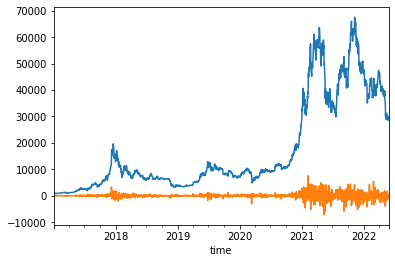

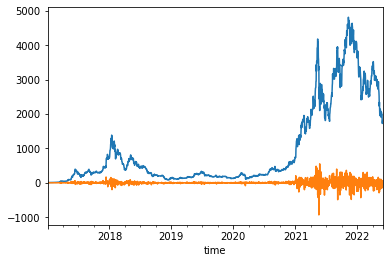

In [285]:
for asset in asset_ls:
    daily_df = daily_history_df[daily_history_df['ticker'] == asset].copy()
    daily_df['returns'] = daily_df['close'] -daily_df['open']
    daily_df['open'].plot()
    daily_df['returns'].plot()
    plt.show()

In [286]:
initial_allocation_ratio = np.array([[.6],[.2],[.1]])

portfolio_df = pd.DataFrame(np.repeat(initial_allocation_ratio, daily_df.shape[0], axis=1).T,columns=['BTC','ETH','USD'],index=daily_df.index)
portfolio_df

,BTC,ETH,USD
time,,,
2017-01-02,0.6,0.2,0.1
2017-01-03,0.6,0.2,0.1
2017-01-04,0.6,0.2,0.1
2017-01-05,0.6,0.2,0.1
2017-01-06,0.6,0.2,0.1
...,...,...,...
2022-05-25,0.6,0.2,0.1
2022-05-26,0.6,0.2,0.1
2022-05-27,0.6,0.2,0.1


In [287]:
def get_daily_return(ticker, time, df=daily_history_df):
    if ticker == 'USD':
        return 1.0
    else:
        df = df.loc[time]
        asset_df = df[df['ticker'].apply(lambda x: ticker in x)]
        return (asset_df['close']/asset_df['open']).values[0]

In [288]:
def calc_asset_daily_returns(row):
    asset_ls = row.index
    time = row.name
    daily_returns_ls = np.array([get_daily_return(asset, time) for asset in asset_ls])
    return daily_returns_ls

In [318]:
def get_random_ratio():
    r_ar = np.random.random((len(asset_ls)+1,1))
    random_portfolio_ratio = r_ar / sum(r_ar)
    if random_portfolio_ratio[-1] > .5: #limit USD ratio to less than half
        return get_random_ratio()
    else:
        return (random_portfolio_ratio * 100).astype(int)/100

In [320]:
asset_daily_returns_df = portfolio_df.apply(lambda x: pd.Series(calc_asset_daily_returns(x),index=portfolio_df.columns), axis=1)
asset_daily_returns_df

,BTC,ETH,USD
time,,,
2017-01-02,1.018621,1.021951,1.0
2017-01-03,1.009046,1.144391,1.0
2017-01-04,1.107388,1.161123,1.0
2017-01-05,0.890284,0.919137,1.0
2017-01-06,0.889484,0.991202,1.0
...,...,...,...
2022-05-25,0.995811,0.981238,1.0
2022-05-26,0.988563,0.922787,1.0
2022-05-27,0.980534,0.963549,1.0


In [321]:
initial_allocation_total_value=1000.00
initial_allocation_ratio=np.array([[.6],[.2],[.1]])
asset_daily_returns_df=asset_daily_returns_df

initial_allocation = initial_allocation_ratio * initial_allocation_total_value 
portfolio_df = pd.DataFrame(np.repeat(initial_allocation_ratio, daily_df.shape[0], axis=1).T,columns=['BTC','ETH','USD'],index=daily_df.index)


return_df = (asset_daily_returns_df).shift(1)
accumulator_df = pd.DataFrame(columns=asset_daily_returns_df.columns,index=asset_daily_returns_df.index)
accumulator_df.iloc[0] = pd.Series(initial_allocation.flatten(),index=asset_daily_returns_df.columns) # initialize portfolio value of first index

shape = accumulator_df.shape[0]
cummulated_returns = (np.cumprod(return_df.shift(-1).values, axis=0)-1)*np.tile(initial_allocation,[shape,1]).reshape(shape, accumulator_df.columns.shape[0]) +\
    np.tile(initial_allocation,[shape,1]).reshape(shape,accumulator_df.columns.shape[0])

accumulator_df.iloc[1:] = pd.DataFrame(cummulated_returns, index=accumulator_df.index).shift(1)
accumulator_df

,BTC,ETH,USD
time,,,
2017-01-02,600,200,100
2017-01-03,611.173,204.39,100
2017-01-04,616.701,233.902,100
2017-01-05,682.928,271.589,100
2017-01-06,607.999,249.628,100
...,...,...,...
2022-05-25,17682,48557.6,100
2022-05-26,17607.9,47646.6,100
2022-05-27,17406.6,43967.7,100


In [322]:
def get_accumulated_return(initial_allocation_total_value=1000.00, initial_allocation_ratio=np.array([[.6],[.2],[.1]]), asset_daily_returns_df=asset_daily_returns_df):

    initial_allocation = initial_allocation_ratio * initial_allocation_total_value 
    portfolio_df = pd.DataFrame(np.repeat(initial_allocation_ratio, daily_df.shape[0], axis=1).T,columns=['BTC','ETH','USD'],index=daily_df.index)
    
    return_df = (asset_daily_returns_df).shift(1)
    accumulator_df = pd.DataFrame(columns=asset_daily_returns_df.columns,index=asset_daily_returns_df.index)
    accumulator_df.iloc[0] = pd.Series(initial_allocation.flatten(),index=asset_daily_returns_df.columns) # initialize portfolio value of first index

    shape = accumulator_df.shape[0]
    cummulated_returns = (np.cumprod(return_df.shift(-1).values, axis=0)-1)*np.tile(initial_allocation,[shape,1]).reshape(shape, accumulator_df.columns.shape[0]) +\
        np.tile(initial_allocation,[shape,1]).reshape(shape,accumulator_df.columns.shape[0])

    accumulator_df.iloc[1:] = pd.DataFrame(cummulated_returns, index=accumulator_df.index).shift(1)

    return accumulator_df

get_accumulated_return(initial_allocation_ratio=np.array([[.6],[.2],[.1]]))

,BTC,ETH,USD
time,,,
2017-01-02,600,200,100
2017-01-03,611.173,204.39,100
2017-01-04,616.701,233.902,100
2017-01-05,682.928,271.589,100
2017-01-06,607.999,249.628,100
...,...,...,...
2022-05-25,17682,48557.6,100
2022-05-26,17607.9,47646.6,100
2022-05-27,17406.6,43967.7,100


[[ 90.]
 [360.]
 [500.]]


,[0.09 0.36 0.5 ]
time,
2017-01-02,950.000000
2017-01-03,959.578337
2017-01-04,1013.529570
2017-01-05,1091.300099
2017-01-06,1040.530330
...,...
2022-05-25,90556.030988
2022-05-26,88905.055711
2022-05-27,82252.776568


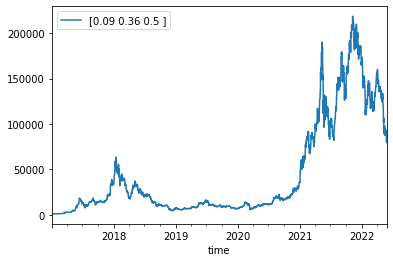

[0.09 0.36 0.5 ]  <lambda>    0.626367
dtype: float64

In [323]:
ratio_ls = [#'BTC','ETH','ADA','USD'
             [[0.09 ],[0.36],[0.5]]
            ]

marker_ls = ['-','-.','x','v']
portfolios = pd.DataFrame()

for i,ratio in enumerate(ratio_ls):
    initial_allocation_ratio = np.array(ratio)
    initial_allocation_total_value = 1000.00
    initial_allocation = initial_allocation_ratio  * initial_allocation_total_value
    print(initial_allocation)
    current_portfolio = get_accumulated_return(initial_allocation_total_value=1000.00, initial_allocation_ratio=initial_allocation_ratio)\
        .sum(axis=1).to_frame().rename(columns={0:str(initial_allocation_ratio.flatten())})
    display(current_portfolio)
    portfolios = pd.concat([portfolios , current_portfolio], axis=1)
portfolios.plot()
plt.show()
agg_period = 90
sharp_calc_df = portfolios.rolling(agg_period).agg([lambda x: (x[-1]-x[0])/np.std(x)])
sharp_df = sharp_calc_df .mean()
display(sharp_df)

[0.09 0.36 0.5 ]  <lambda>    0.626367
dtype: float64


,[0.09 0.36 0.5 ]
count,1974.000000
mean,43856.211804
std,54501.079013
min,950.000000
25%,9337.576053
50%,15093.465197
75%,60332.870291
max,218767.037252


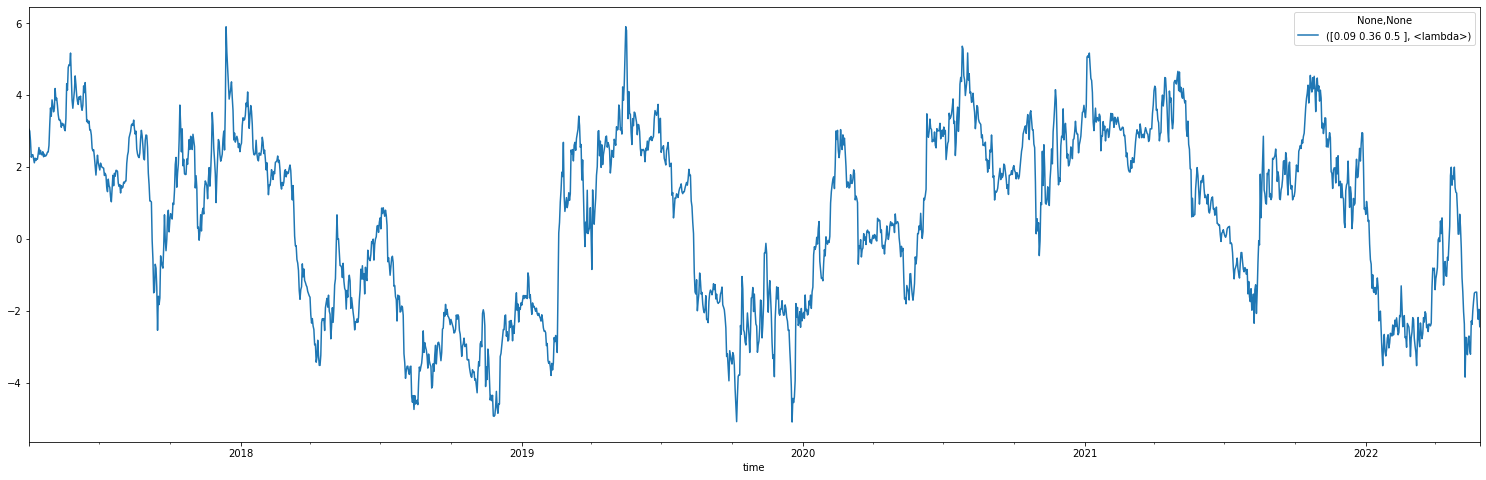

In [324]:
agg_period = 90
sharp_calc_df = portfolios.rolling(agg_period).agg([lambda x: (x[-1]-x[0])/np.std(x)])
sharp_calc_df.dropna().plot(figsize=(26,8))

sharp_df = portfolios.rolling(agg_period).agg([lambda x: (x[-1]-x[0])/np.std(x)]).mean()
print(sharp_df[sharp_df.max()==sharp_df])
portfolios.describe()

In [325]:
get_random_ratio()

array([[0.06],
       [0.49],
       [0.44]])

In [326]:
def generate_eval_portfolio(initial_allocation_total_value=1000):
    ratio_ls = [#'BTC','ETH','USD'
                get_random_ratio(),
                ]
   
    for i,ratio in enumerate(ratio_ls):
        initial_allocation_ratio = np.array(ratio)
        initial_allocation = initial_allocation_ratio * initial_allocation_total_value
        
        current_portfolio = get_accumulated_return(initial_allocation_total_value=1000.00, initial_allocation_ratio=initial_allocation_ratio)\
            .sum(axis=1).to_frame().rename(columns={0:str(initial_allocation_ratio.flatten())})
    
    return  current_portfolio.resample('30d').pipe(lambda df: (df.last() - df.first())/df.std()).mean(axis=0)

In [327]:
%%time
for _ in range(1000):
    get_accumulated_return()

CPU times: user 2.72 s, sys: 11.9 ms, total: 2.73 s
Wall time: 2.73 s


### Static portfolio allocation sampling by brute force grid search

In [ ]:
%%time
from tqdm import tqdm
from IPython.display import clear_output

best = -np.inf
for i in tqdm(range(int(1e5))):
    best_out_of_4 = generate_eval_portfolio()
    #print(best_out_of_4.values[0] )
    if best_out_of_4.values[0] > best:
        best = best_out_of_4.values[0]
        optimal_ratio = best_out_of_4.index[0]
        clear_output(wait=True)
        print('optimal_ratio', optimal_ratio)
        print('best sharp', best)
        plt.show()

  3%|▎         | 3488/100000 [00:31<14:14, 112.96it/s]

optimal_ratio [0.64 0.07 0.28]
best sharp 0.4753613034499168


 36%|███▌      | 35628/100000 [05:23<09:44, 110.07it/s]

### Dynanmic portfolio allocation thru AI portfolio manager

#### Portfolio rebalancing can be simulated on daily period with the goal of beating the best static allocation. Timeseries crossvalidation will be implemented to validate/simulate the lack of future performance informatio(eg. ETH outperformed all other assets).

#### Model will output portfolio ratios for each of the 4 assets. The loss function will be the rolling 90 day sharp ratio calculated at daily interval.

#### First method will be a simple approach with previous portfolio ratio and aggregated rolling price info as features to a portfolio mangement model. Output will be the asset ratio of the portfolio. Optimization of the model weight will be based on Genetic Algo with the fitness function being the 90 rolling sharp ratio.

## Use longer term return as fitness function in Genetic Algorithm to opitimize Pytorch NN

In [16]:
from pytorch_tabnet.tab_model import TabNetRegressor

In [17]:
tabnet = TabNetRegressor()

data_inputs = np.random.random((10000,16))
X_train = pd.DataFrame(data_inputs).sample(100000,replace=True, random_state=0)
y_train = (X_train.iloc[:,0]**2+1).to_frame().sample(100000,replace=True, random_state=0)

tabnet.fit(
    X_train=X_train.values,
    y_train=y_train.values,
    max_epochs=1,
    drop_last=True)

Device used : cuda
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.15902 |  0:00:04s


In [18]:
model = tabnet.network.cpu()

In [19]:
import pygad
from pygad import torchga

torch_ga = torchga.TorchGA(model=model,
                                num_solutions=10)

In [20]:
import numpy

# Data inputs
data_inputs = np.random.random((10000,16))

# Data outputs
data_outputs = np.random.random((10000,1))

In [21]:
model(torch.from_numpy(data_inputs).float()+3)[0]

NameError: name 'torch' is not defined

In [ ]:
loss_function = torch.nn.MSELoss()

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function
    
    model_weights_dict = torchga.model_weights_as_dict(model=model,
                                                         weights_vector=solution)
    # Use the current solution as the model parameters.
    model.load_state_dict(model_weights_dict)
    
    predictions = model(torch.from_numpy(data_inputs).float())[0]
    print(predictions)
    solution_fitness = 1.0 / (loss_function(predictions, torch.from_numpy(data_outputs).float()).detach().numpy() + 0.00000001)

    return solution_fitness

In [ ]:
def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))


In [ ]:
num_generations = 250
num_parents_mating = 5
initial_population = torch_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

In [ ]:
ga_instance.run()

In [ ]:
ga_instance.plot_result(title="PyGAD & PyTorch - Iteration vs. Fitness")